#Implement the connected component labeling algorithm discussed in class on the image given in the lab.



1.	Use 4-connectivity

In [ ]:
import numpy as np
from PIL import Image,ImageOps
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt
import cv2
%matplotlib inline

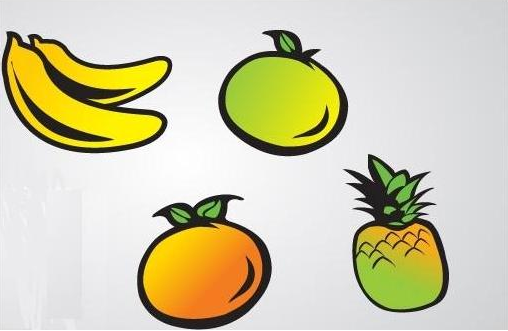

In [ ]:
img = Image.open('Lab5-image.png')
img

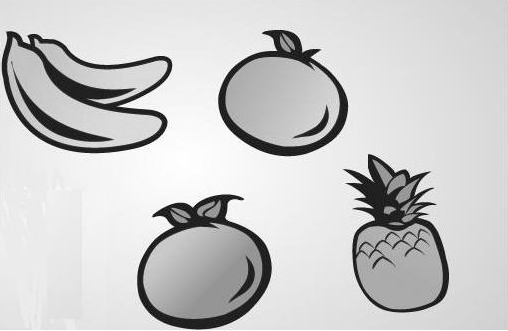

In [ ]:
g_img = img.convert('L')
g_img

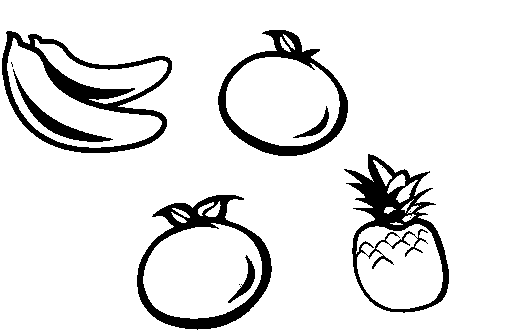

In [ ]:
binarized = g_img.point(lambda x: 0 if x<128 else 255,'1')
binarized

In [ ]:
binarized_data = np.array(binarized).astype(int)
# for row in range(binarized_data.shape[0]):
#    for col in range(binarized_data.shape[1]):
#      if (binarized_data[row][col]==1):
#        binarized_data[row][col]=0
#      elif(binarized_data[row][col]==0):
#        binarized_data[row][col]=1
binarized_data
# binarized_data = np.array(
#             [[1, 1, 0, 1, 1, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 1],
#              [1, 1, 1, 1, 0, 1, 0, 1], [0, 0, 0, 1, 0, 1, 0, 1], [1, 1, 1, 1, 0, 0, 0, 1], [1, 1, 1, 1, 0, 1, 1, 1]],
#             np.int32)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [ ]:
binarized_data.shape

(331, 508)

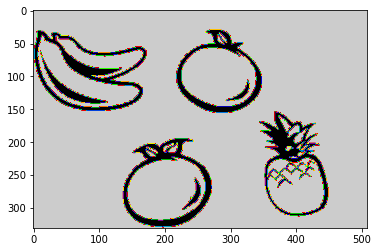

In [ ]:
imshow(binarized_data,cmap='nipy_spectral')

In [ ]:
label = 1;
eq_dict = {}
for row in range(binarized_data.shape[0]):
  for col in range(binarized_data.shape[1]):
    #if first pixel
    if (row==0 and col==0):
     if (binarized_data[row][col]==1):
       binarized_data[row][col] = label
       eq_dict[label]=label
    #first row
    if (row==0 and col>0):
      if (binarized_data[row][col]==1 and binarized_data[row][col-1]!=False):
        binarized_data[row][col] = binarized_data[row][col-1]
      if (binarized_data[row][col]==1 and binarized_data[row][col-1]==False):
        label=label+1
        binarized_data[row][col]=label
        eq_dict[label]=label
    #first column
    if (col==0 and row>0):
      if (binarized_data[row][col]==1 and binarized_data[row-1][col]!=False):
        binarized_data[row][col] = binarized_data[row-1][col]
      if (binarized_data[row][col]==1 and binarized_data[row-1][col]==False):
        label=label+1
        binarized_data[row][col]=label
        eq_dict[label]=label
    #other cases
    else:
      if (binarized_data[row][col]==1):
        #if left element is black and up one is not black
        if ((binarized_data[row-1][col]!=0) and (binarized_data[row][col-1]==0)):
          binarized_data[row][col]=binarized_data[row-1][col]
        #if up one is black and left one is not black
        elif ((binarized_data[row-1][col]==0) and (binarized_data[row][col-1]!=0)):
          binarized_data[row][col]=binarized_data[row][col-1]
        #top and left are labelled and both are equal
        elif ((binarized_data[row-1][col]!=0) and (binarized_data[row][col-1]!=0) and (binarized_data[row-1][col]==binarized_data[row][col-1])):
          binarized_data[row][col]=binarized_data[row-1][col]
        #top and left both labelled and both different
        elif ((binarized_data[row-1][col]!=0) and (binarized_data[row][col-1]!=0) and (binarized_data[row-1][col]!=binarized_data[row][col-1])):
           binarized_data[row][col] = min(binarized_data[row-1][col],binarized_data[row][col-1])
           eq_dict[max(binarized_data[row-1][col],binarized_data[row][col-1])]=binarized_data[row][col]
        else:
          label=label+1
          binarized_data[row][col]=label
          eq_dict[label]=label

In [ ]:
binarized_data

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

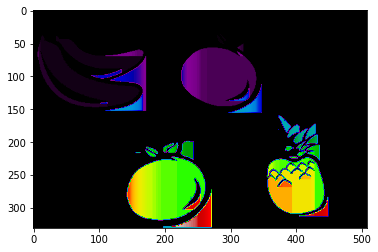

In [ ]:
imshow(binarized_data,cmap='nipy_spectral')

In [ ]:
eq_dict

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 4,
 7: 6,
 8: 4,
 9: 1,
 10: 8,
 11: 9,
 12: 11,
 13: 12,
 14: 13,
 15: 10,
 16: 14,
 17: 17,
 18: 17,
 19: 18,
 20: 5,
 21: 19,
 22: 5,
 23: 21,
 24: 5,
 25: 23,
 26: 15,
 27: 5,
 28: 25,
 29: 17,
 30: 5,
 31: 28,
 32: 5,
 33: 31,
 34: 5,
 35: 33,
 36: 5,
 37: 35,
 38: 5,
 39: 37,
 40: 5,
 41: 39,
 42: 1,
 43: 41,
 44: 43,
 45: 44,
 46: 1,
 47: 45,
 48: 1,
 49: 47,
 50: 49,
 51: 1,
 52: 50,
 53: 1,
 54: 52,
 55: 53,
 56: 54,
 57: 55,
 58: 57,
 59: 56,
 60: 58,
 61: 59,
 62: 60,
 63: 62,
 64: 61,
 65: 63,
 66: 65,
 67: 66,
 68: 64,
 69: 67,
 70: 69,
 71: 5,
 72: 70,
 73: 71,
 74: 72,
 75: 68,
 76: 73,
 77: 74,
 78: 76,
 79: 77,
 80: 78,
 81: 79,
 82: 80,
 83: 81,
 84: 82,
 85: 83,
 86: 84,
 87: 85,
 88: 86,
 89: 87,
 90: 88,
 91: 90,
 92: 89,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 1,
 101: 1,
 102: 17,
 103: 102,
 104: 1,
 105: 1,
 106: 103,
 107: 1,
 108: 1,
 109: 106,
 110: 109,
 111: 1,
 112: 1,
 113: 110,
 114: 11

In [ ]:
for row in range(binarized_data.shape[0]):
  for col in range(binarized_data.shape[1]):
    binarized_data[row][col]=eq_dict.get(binarized_data[row][col],0)

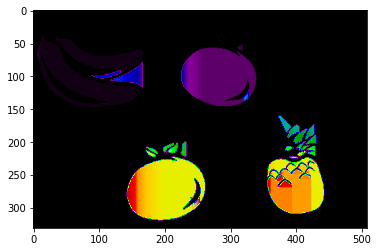

In [ ]:
imshow(binarized_data,cmap='nipy_spectral')

In [ ]:
eq_dict

{2: 2,
 3: 3,
 4: 2,
 5: 3,
 6: 4,
 7: 6,
 8: 3,
 9: 8,
 10: 3,
 11: 10,
 12: 2,
 13: 11,
 14: 2,
 15: 2,
 16: 2,
 17: 15,
 18: 13,
 19: 17,
 20: 19,
 21: 20,
 22: 22,
 23: 21,
 24: 22,
 25: 23,
 26: 18,
 27: 24,
 28: 25,
 29: 27,
 30: 28,
 31: 29,
 32: 30,
 33: 8,
 34: 32,
 35: 35,
 36: 8,
 37: 34,
 38: 8,
 39: 37,
 40: 40,
 41: 8,
 42: 39,
 43: 42,
 44: 43,
 45: 22,
 46: 44,
 47: 46,
 48: 48,
 49: 47,
 50: 45,
 51: 49,
 52: 51,
 53: 50,
 54: 52,
 55: 53,
 56: 54,
 57: 55,
 58: 56,
 59: 57,
 60: 58,
 61: 59,
 62: 61,
 63: 60,
 64: 62,
 65: 64,
 66: 63,
 67: 65,
 68: 67,
 69: 66,
 70: 68,
 71: 70,
 72: 71,
 73: 69,
 74: 72,
 75: 3,
 76: 74,
 77: 76,
 78: 73,
 79: 77,
 80: 79,
 81: 80,
 82: 78,
 83: 81,
 84: 83,
 85: 84,
 86: 85,
 87: 82,
 88: 86,
 89: 88,
 90: 89,
 91: 3,
 92: 3,
 93: 3,
 94: 3,
 95: 95,
 96: 2,
 97: 95,
 98: 97,
 99: 96,
 100: 98,
 101: 99,
 102: 100,
 103: 102,
 104: 101,
 105: 103,
 106: 105,
 107: 104,
 108: 106,
 109: 107,
 110: 3,
 111: 108,
 112: 111,
 113: 109,